In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/tf/media/ryan/bigboi/datasets/xview3/val/labels/validation.csv')
df = df[df['is_vessel'].isin([False])].reset_index()
df

index  detect_lat  detect_lon  vessel_length_m      source  \
0         3   44.066985   13.249822              NaN  ais/manual   
1         4   44.067516   13.249182              NaN  ais/manual   
2         7   44.404813   13.438451              NaN  ais/manual   
3        11   44.229382   12.704860              NaN  ais/manual   
4        18   44.494985   12.313861              NaN  ais/manual   
...     ...         ...         ...              ...         ...   
7143  19132   42.401521   15.664264              NaN      manual   
7144  19141   42.398816   14.418042        62.824576  ais/manual   
7145  19144   42.201240   14.937324        49.377288  ais/manual   
7146  19197   42.465550   14.319871        20.950000  ais/manual   
7147  19218   42.235911   14.931472        15.780000  ais/manual   

      detect_scene_row  detect_scene_column is_vessel is_fishing  \
0                12415                24679     False        NaN   
1                12409                24674     False        NaN   
2                 8693                26261     False        NaN   
3                10504                20365     False        NaN   
4                 7459                17339     False        NaN   
...                ...                  ...       ...        ...   
7143              3348                14914     False        NaN   
7144              3383                 4658     False        NaN   
7145              5593                 8930     False        NaN   
7146              2636                 3856     False        NaN   
7147              5208                 8882     False        NaN   

      distance_from_shore_km           scene_id confidence      top     left  \
0                9999.990000  264ed833a13b7f2av       HIGH  12412.0  24676.0   
1                9999.990000  264ed833a13b7f2av       HIGH  12406.0  24670.0   
2                9999.990000  264ed833a13b7f2av       HIGH   8691.0  26258.0   
3                9999.990000  264ed833a13b7f2av       HIGH  10501.0  20362.0   
4                   2.307268  264ed833a13b7f2av       HIGH   7456.0  17337.0   
...                      ...                ...        ...      ...      ...   
7143             9999.990000  3808f5703f0920bfv     MEDIUM   3340.0  14908.0   
7144                3.200877  3808f5703f0920bfv       HIGH   3367.0   4653.0   
7145             9999.990000  3808f5703f0920bfv       HIGH   5586.0   8914.0   
7146                4.951835  3808f5703f0920bfv       HIGH   2625.0   3851.0   
7147             9999.990000  3808f5703f0920bfv       HIGH   5197.0   8875.0   

       bottom    right                                          detect_id  
0     12418.0  24683.0  264ed833a13b7f2av_044.06698538999999925636_013...  
1     12412.0  24679.0  264ed833a13b7f2av_044.06751578000000080237_013...  
2      8695.0  26264.0  264ed833a13b7f2av_044.40481307000000299468_013...  
3     10507.0  20369.0  264ed833a13b7f2av_044.22938227000000210865_012...  
4      7463.0  17342.0  264ed833a13b7f2av_044.49498472999999876265_012...  
...       ...      ...                                                ...  
7143   3356.0  14920.0  3808f5703f0920bfv_042.40152118000000314169_015...  
7144   3399.0   4664.0  3808f5703f0920bfv_042.39881645999999904006_014...  
7145   5600.0   8946.0  3808f5703f0920bfv_042.20123954999999682514_014...  
7146   2647.0   3861.0  3808f5703f0920bfv_042.46555036000000171725_014...  
7147   5220.0   8890.0  3808f5703f0920bfv_042.23591053999999900270_014...  

[7148 rows x 17 columns]

(array([6.870e+02, 2.317e+03, 1.816e+03, 8.320e+02, 4.220e+02, 3.230e+02,
        2.400e+02, 1.980e+02, 7.600e+01, 6.800e+01, 4.900e+01, 3.600e+01,
        2.100e+01, 9.000e+00, 9.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 1.  ,  4.88,  8.76, 12.64, 16.52, 20.4 , 24.28, 28.16, 32.04,
        35.92, 39.8 , 43.68, 47.56, 51.44, 55.32, 59.2 , 63.08, 66.96,
        70.84, 74.72, 78.6 , 82.48, 86.36, 90.24, 94.12, 98.  ]),
 <BarContainer object of 25 artists>)

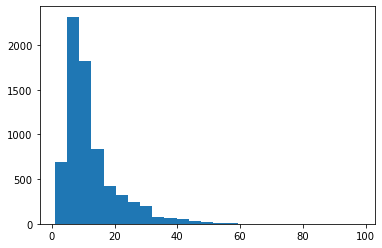

In [3]:
plt.hist(df.bottom.values - df.top.values, bins=25)

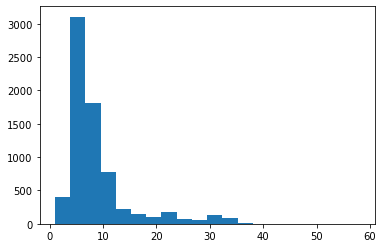

In [4]:
plt.hist(df.right.values - df.left.values, bins=20);

In [11]:
df.shape

(53067, 17)

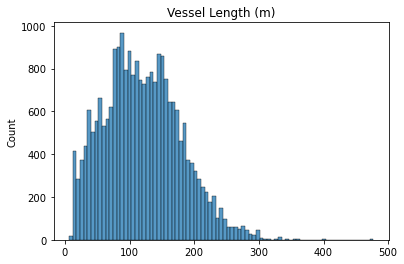

In [12]:
plt.title('Vessel Length (m)')
sns.histplot(df.vessel_length_m.values[df.is_fishing.values==False])
plt.show()

In [21]:
lengths = df.vessel_length_m.values[df.is_fishing.values==False]
print(f'Avg length of vessels: {np.mean(lengths[~np.isnan(lengths)])} m')

Avg length of vessels: 120.02427980244752 m


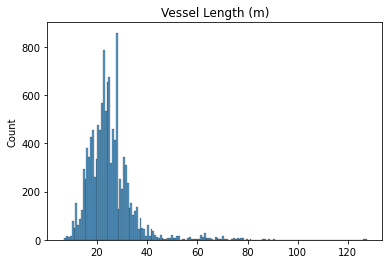

In [17]:
plt.title('Vessel Length (m)')
sns.histplot(df.vessel_length_m.values[df.is_fishing.values==True])
plt.show()

In [20]:
lengths = df.vessel_length_m.values[df.is_fishing.values==True]
print(f'Avg length of fishing vessel: {np.mean(lengths[~np.isnan(lengths)])} m')

Avg length of fishing vessel: 25.060508501664764 m


In [18]:
nans = np.isnan(df.vessel_length_m.values)
nans[nans==True].shape

(18810,)

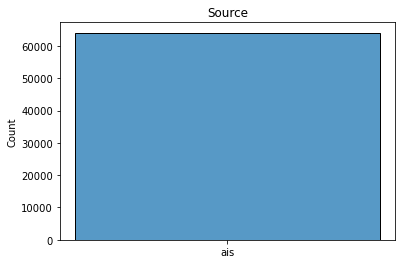

In [20]:
plt.title('Source')
sns.histplot(df.source.values)
plt.show()

/root/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


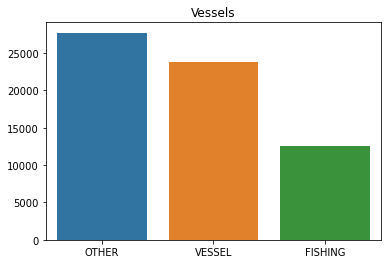

In [37]:
df['is_fishing'] = df['is_fishing'].fillna(False)
df['is_vessel'] = df['is_vessel'].fillna(False)

labels = df[['is_vessel', 'is_fishing']].values
ohe_label = np.zeros((labels.shape[0],3))
ohe_label[np.argwhere(np.logical_and(labels[:,0]==False, labels[:,1]==False))] = np.array([1.0,0.0,0.0]) #NOTHING
ohe_label[np.argwhere(np.logical_and(labels[:,0]==True, labels[:,1]==False))] = np.array([0.0,1.0,0.0])  #VESSEL
ohe_label[np.argwhere(np.logical_and(labels[:,0]==True, labels[:,1]==True))] = np.array([0.0,0.0,1.0]) #FISHING

nums = np.sum(ohe_label, axis=0)

cate = ['OTHER', 'VESSEL', 'FISHING']

plt.title('Vessels')
sns.barplot(cate, nums)
plt.show()

In [48]:
# conf = np.unique(df.confidence.values)
conf = np.array(['LOW', 'MEDIUM', 'HIGH'])
nums = [np.argwhere(df.confidence.values == conf[c]).shape[0] for c in range(conf.shape[0])]

/root/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


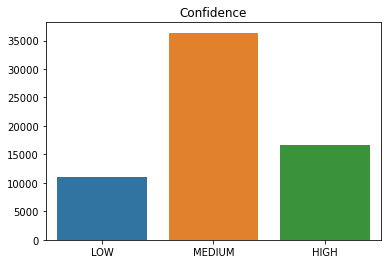

In [49]:
plt.title('Confidence')
sns.barplot(conf, nums)
plt.show()

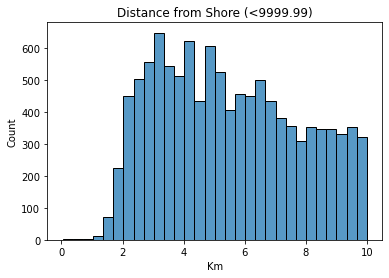

In [55]:
plt.title("Distance from Shore (<9999.99)")
sns.histplot(df.distance_from_shore_km.values[df.distance_from_shore_km.values != 9999.990000])
plt.xlabel('Km')
plt.show()

# Filtering

In [21]:
import glob
from PIL import Image
import sys
import scipy as sp

In [59]:
sys.path.append('/tf/home/ryan/repos/PyRAT/pyrat/filter/')
# from filter.Despeckle.Despeckle_extensions import cy_leeimproved

In [65]:
class Kuan():
    """
    Kuan filter. Similar performance to the Lee filter but with a different weighting function.
    further information:
    D.T.Kuan et al. “Adaptive restoration of images with speckle,” IEEE Trans. Acoustics, Speech and Sig.
    Proc., vol. ASSP-35, pp. 373-383, March 1987
    :author: Joel Amao
    :param array: The image to filter (2D np.ndarray)
    :type array: float
    :param win: The filter window size (default: [7,7])
    :type win: integer
    :param looks=1.0: The effective number of looks of the input image.
    :type looks: float
    :returns: filtered image
    """
    gui = {'menu': 'SAR|Speckle filter', 'entry': 'Kuan'}
    para = [
        {'var': 'win', 'value': [7, 7], 'type': 'int', 'range': [3, 999], 'text': 'Window size',
         'subtext': ['range', 'azimuth']},
        {'var': 'looks', 'value': 1.0, 'type': 'float', 'range': [1.0, 99.0], 'text': '# of looks'}
    ]

    def __init__(self, *args, **kwargs):
        super(Kuan, self).__init__(*args, **kwargs)
        self.name = "KUAN FILTER"
        self.blockprocess = True
        self.win = [7,7]
        self.looks = 1.0
        self.blockoverlap = self.win[0] // 2 + 1

    def filter(self, array, *args, **kwargs):
        array[np.isnan(array)] = 0.0
        shape = array.shape
        if len(shape) == 3:
            array = np.abs(array)
            span = np.sum(array ** 2, axis=0)
            array = array[np.newaxis, ...]
        elif len(shape) == 4:
            span = np.abs(np.trace(array, axis1=0, axis2=1))
        else:
            array = np.abs(array)
            span = array ** 2
            array = array[np.newaxis, np.newaxis, ...]
        lshape = array.shape[0:2]

        # Calculates the squared mean of the array (marr) and the mean squared array (m2arr)
        m2arr = sp.ndimage.filters.uniform_filter(span ** 2, size=self.win)
        marr = sp.ndimage.filters.uniform_filter(span, size=self.win)
        # Variance within window, follows the identity Var(x) = E(x**2) - [E(X)]**2
        vary = (m2arr - marr ** 2).clip(1e-10)
        # Standard deviation within window
        stdDev = np.sqrt(vary)
        # cu and ci are the main parameters of the weight function w
        cu = np.sqrt(1 / self.looks)
        if not cu:
            cu = 0.25

        ci = (stdDev / marr)
        if not ci.any():
            ci = 0.0001

        # Clipped weighted function
        w = (1 - ((cu ** 2) / (ci ** 2))).clip(0) / ((1 + (cu ** 2)).clip(1e-10))

        # Filters each channel separately
        out = np.empty_like(array)
        for k in range(lshape[0]):
            for l in range(lshape[1]):
                if np.iscomplexobj(array):
                    out[k, l, ...] = sp.ndimage.filters.uniform_filter(array[k, l, ...].real, size=self.win) + \
                                     1j * sp.ndimage.filters.uniform_filter(array[k, l, ...].imag, size=self.win)
                else:
                    out[k, l, ...] = sp.ndimage.filters.uniform_filter(array[k, l, ...], size=self.win)
                # Main output
                out[k, l, ...] = (array[k, l, ...] * w) + out[k, l, ...] * (1 - w)
        return np.squeeze(out)

In [79]:
class Lee():
    """
    Lee's classical speckle filter from 1981. Not the best one...
    :author: Andreas Reigber
    :param array: The image to filter (2D np.ndarray)
    :type array: float
    :param win: The filter window size (default: [7,7])
    :type win: integer
    :param looks=1.0: The effective number of looks of the input image.
    :type looks: float
    :returns: filtered image
    """
    gui = {'menu': 'SAR|Speckle filter', 'entry': 'Lee MMSE'}
    para = [
        {'var': 'win', 'value': [7, 7], 'type': 'int', 'range': [3, 999], 'text': 'Window size',
         'subtext': ['range', 'azimuth']},
        {'var': 'looks', 'value': 1.0, 'type': 'float', 'range': [1.0, 99.0], 'text': '# of looks'}
    ]

    def __init__(self, *args, **kwargs):
        super(Lee, self).__init__(*args, **kwargs)
        self.name = "LEE FILTER"
        self.blockprocess = True
        self.win = [2,2]
        self.looks = 1.0
        self.blockoverlap = self.win[0] // 2 + 1

    def filter(self, array, *args, **kwargs):
        array[np.isnan(array)] = 0.0
        shape = array.shape
        if len(shape) == 3:
            array = np.abs(array)
            span = np.sum(array ** 2, axis=0)
            array = array[np.newaxis, ...]
        elif len(shape) == 4:
            span = np.abs(np.trace(array, axis1=0, axis2=1))
        else:
            array = np.abs(array)
            span = array ** 2
            array = array[np.newaxis, np.newaxis, ...]
        lshape = array.shape[0:2]

        sig2 = 1.0 / self.looks
        sfak = 1.0 + sig2
        m2arr = sp.ndimage.filters.uniform_filter(span ** 2, size=self.win)
        marr = sp.ndimage.filters.uniform_filter(span, size=self.win)
        vary = (m2arr - marr ** 2).clip(1e-10)
        varx = ((vary - marr ** 2 * sig2) / sfak).clip(0)
        kfac = varx / vary

        out = np.empty_like(array)
        for k in range(lshape[0]):
            for l in range(lshape[1]):
                if np.iscomplexobj(array):
                    out[k, l, ...] = sp.ndimage.filters.uniform_filter(array[k, l, ...].real, size=self.win) + \
                                     1j * sp.ndimage.filters.uniform_filter(array[k, l, ...].imag, size=self.win)
                else:
                    out[k, l, ...] = sp.ndimage.filters.uniform_filter(array[k, l, ...], size=self.win)
                out[k, l, ...] += (array[k, l, ...] - out[k, l, ...]) * kfac
        return np.squeeze(out)

In [80]:
kuan_filt = Kuan()
lee_filt = Lee()
# ref_lee_filt = RefinedLee()
# bi_lat_filt = BilateralFilter()

(1280, 1280, 3)


/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in true_divide


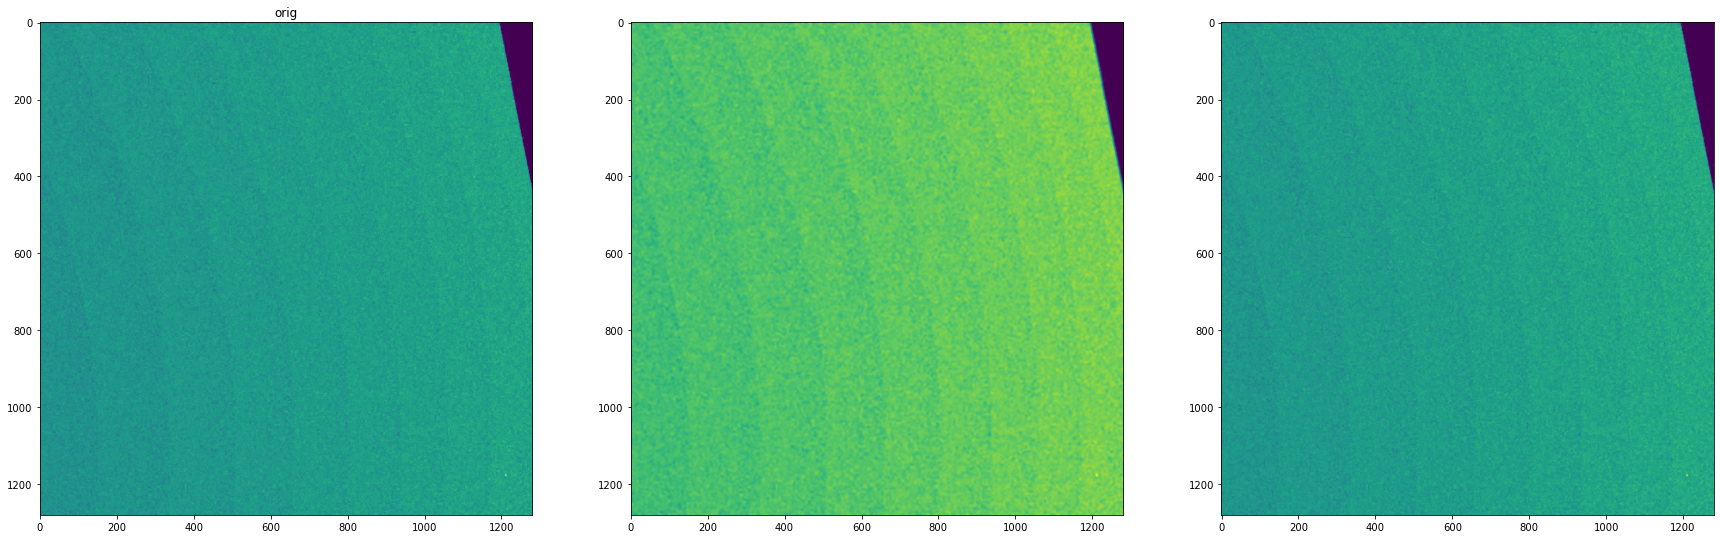

(1280, 1280, 3)


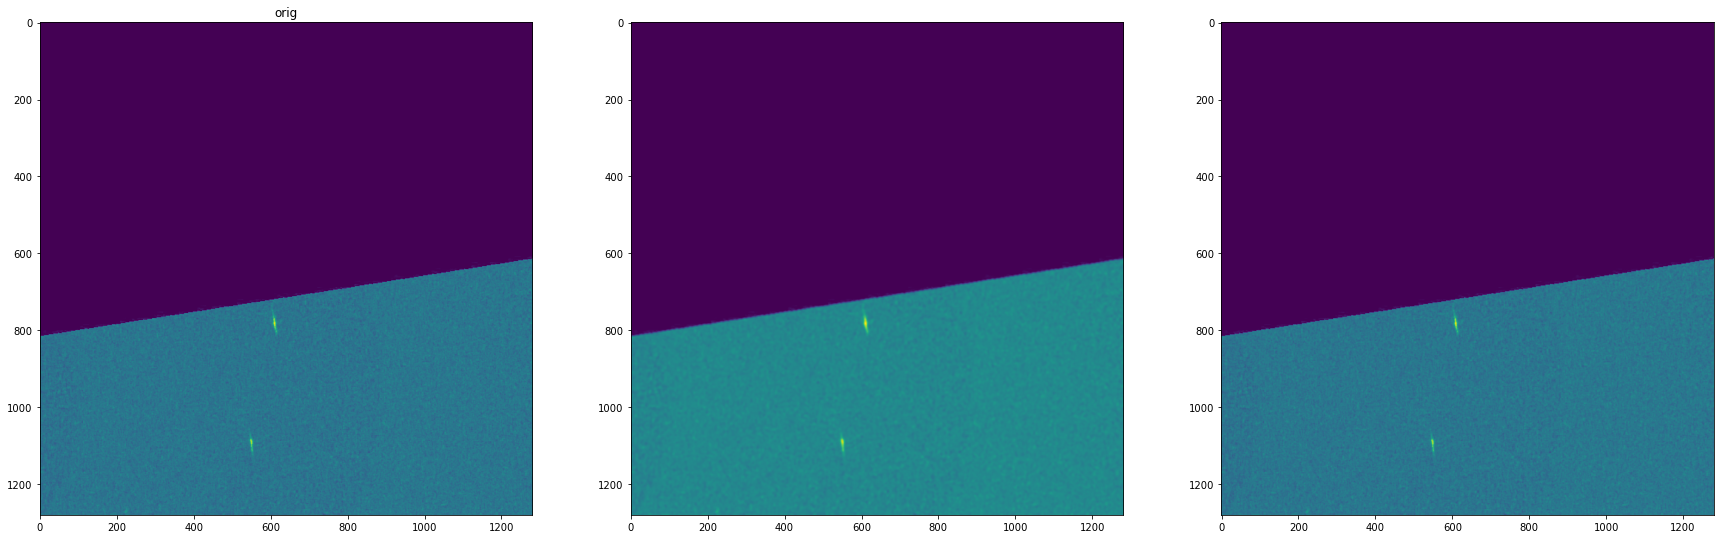

(1280, 1280, 3)


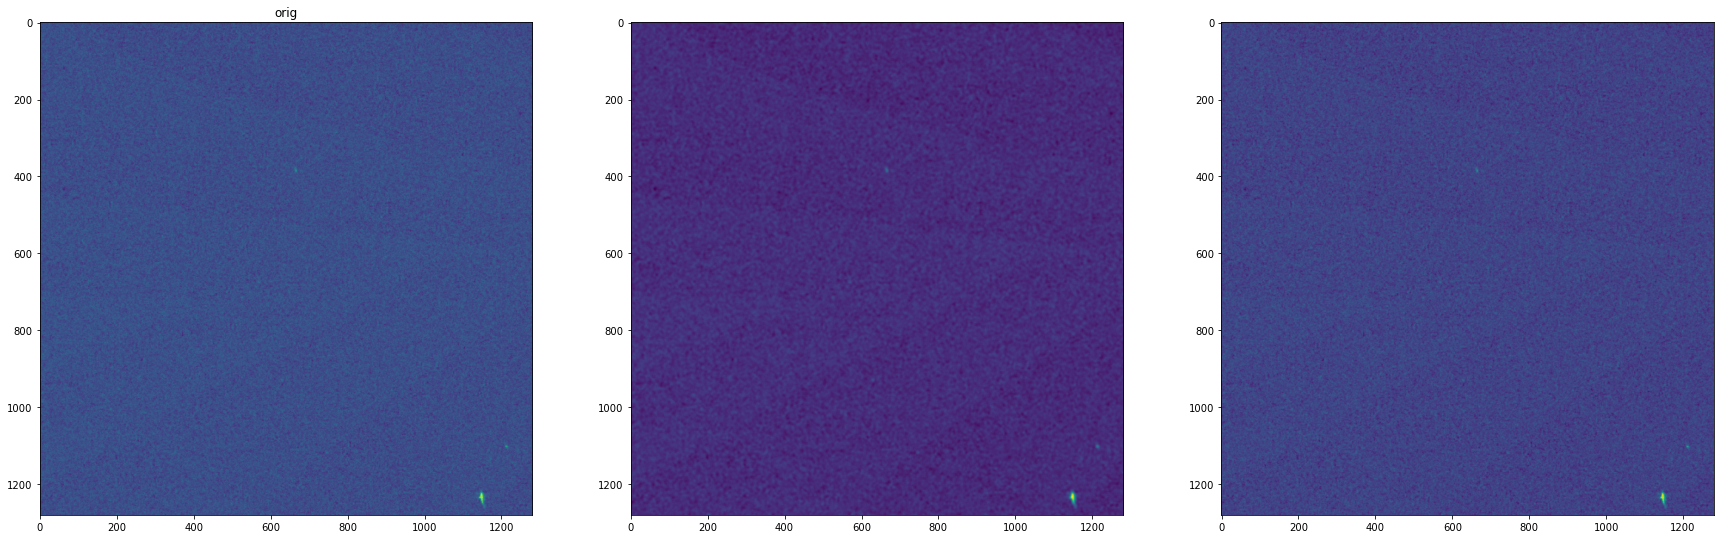

(1280, 1280, 3)


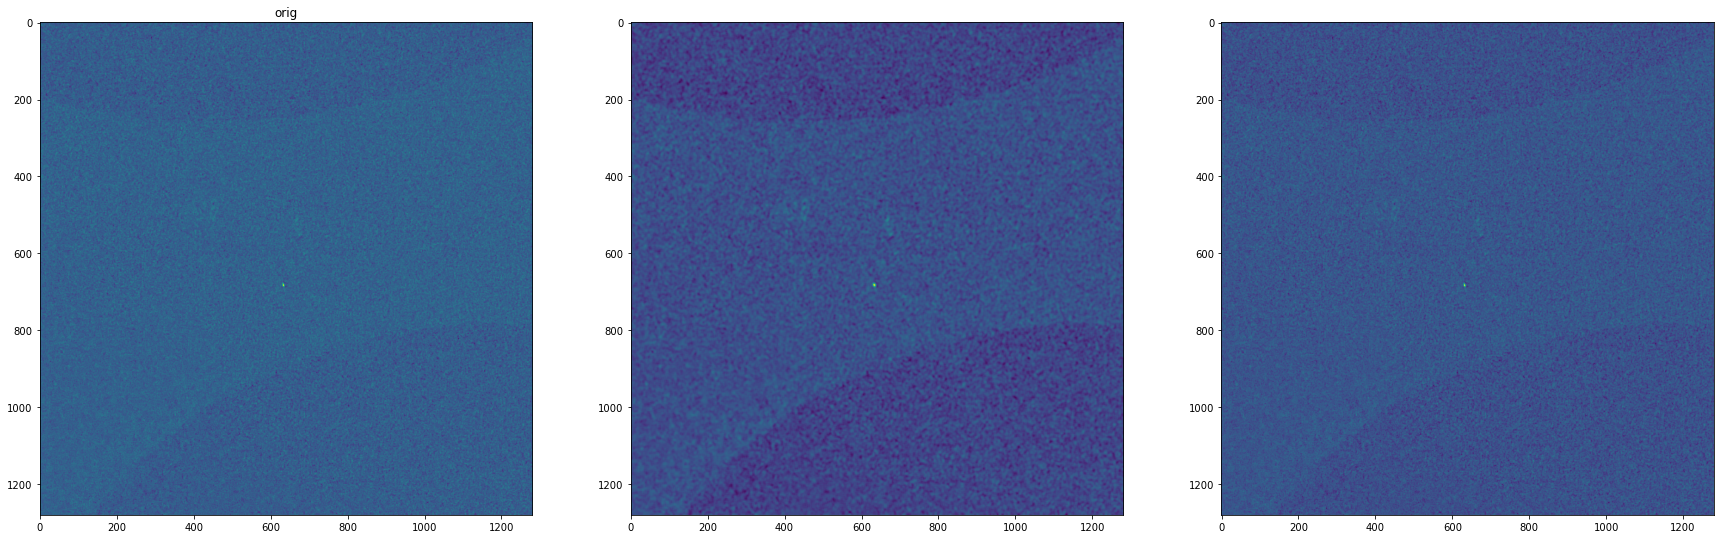

(1280, 1280, 3)


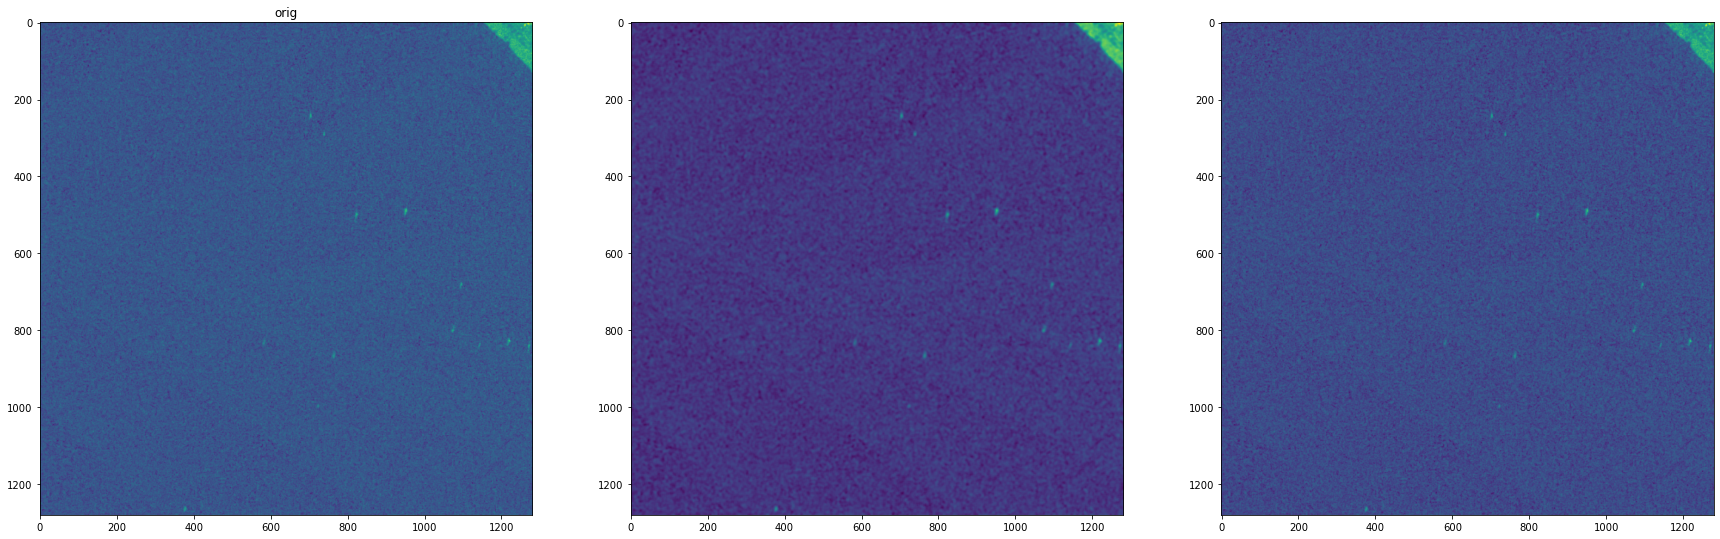

(1280, 1280, 3)


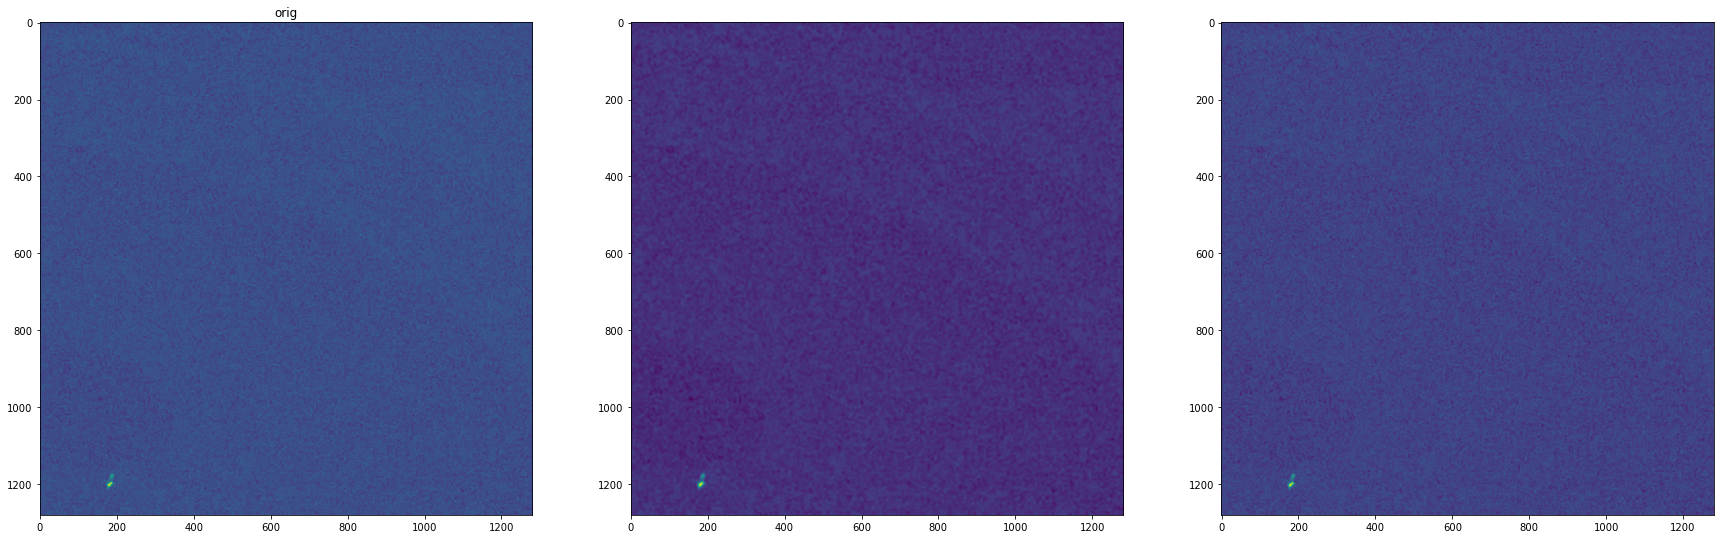

In [81]:
files = glob.glob(f'/tf/media/ryan/bigboi/datasets/xview3/yolov5/datasets/xview3/images/all_channels/train/*.jpg')

for i, f in enumerate(files):
    img = np.array(Image.open(f)).astype(np.float32)
    print(img.shape)

    kuan_filt_img = kuan_filt.filter(img[:,:,0])
    lee_filt_img = lee_filt.filter(img[:,:,0])

    plt.figure(figsize=(30,20))
    plt.subplot(1,3,1)
    plt.title('orig')
    plt.imshow(img[:,:,0])

    plt.subplot(1,3,2)
    plt.imshow(kuan_filt_img)
    
    plt.subplot(1,3,3)
    plt.imshow(lee_filt_img)
    plt.show()
    
    if i == 5:
        break